In [1]:

def water(index, data, Title="", x_lab="", y_lab="",
              formatting = "{:,.1f}", green_color='#29EA38', red_color='#FB3C62', blue_color='#24CAFF',
             sorted_value = False, threshold=None, other_label='other', net_label='net', 
             rotation_value = 30, blank_color=(0,0,0,0), figsize = (10.871,5.515)):
    '''
    Given two sequences ordered appropriately, generate a standard waterfall chart.
    Optionally modify the title, axis labels, number formatting, bar colors, 
    increment sorting, and thresholding. Thresholding groups lower magnitude changes
    into a combined group to display as a single entity on the chart.
    '''
    
    #convert data and index to np.array
    index=np.array(index)
    data=np.array(data)
    
    # wip
    #sorted by absolute value 
    if sorted_value: 
        abs_data = abs(data)
        data_order = np.argsort(abs_data)[::-1]
        data = data[data_order]
        index = index[data_order]
    
    #group contributors less than the threshold into 'other' 
    if threshold:
        
        abs_data = abs(data)
        threshold_v = abs_data.max()*threshold
        
        if threshold_v > abs_data.min():
            index = np.append(index[abs_data>=threshold_v],other_label)
            data = np.append(data[abs_data>=threshold_v],sum(data[abs_data<threshold_v]))
    
    changes = {'amount' : data}
    
    #define format formatter
    def money(x, pos):
        'The two args are the value and tick position'
        return formatting.format(x)
    formatter = FuncFormatter(money)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.yaxis.set_major_formatter(formatter)

    #Store data and create a blank series to use for the waterfall
    trans = pd.DataFrame(data=changes,index=index)
    blank = trans.amount.cumsum().shift(1).fillna(0)
    
    trans['positive'] = trans['amount'] > 0

    #Get the net total number for the final element in the waterfall
    total = trans.sum().amount
    trans.loc[net_label]= total
    blank.loc[net_label] = total

    #The steps graphically show the levels as well as used for label placement
    step = blank.reset_index(drop=True).repeat(3).shift(-1)
    step[1::3] = np.nan

    #When plotting the last element, we want to show the full bar,
    #Set the blank to 0
    blank.loc[net_label] = 0
    
    #define bar colors for net bar
    trans.loc[trans['positive'] > 1, 'positive'] = 99
    trans.loc[trans['positive'] < 0, 'positive'] = 99
    trans.loc[(trans['positive'] > 0) & (trans['positive'] < 1), 'positive'] = 99
    
    trans['color'] = trans['positive']
    
    trans.loc[trans['positive'] == 1, 'color'] = green_color
    trans.loc[trans['positive'] == 0, 'color'] = red_color
    trans.loc[trans['positive'] == 99, 'color'] = blue_color
    
    my_colors = list(trans.color)
    
    #Plot and label
    my_plot = plt.bar(range(0,len(trans.index)), blank, width=0.5, color=blank_color)
    plt.bar(range(0,len(trans.index)), trans.amount, width=0.6,
             bottom=blank, color=my_colors)       
                                   
    
    # connecting lines - figure out later
    #my_plot = lines.Line2D(step.index, step.values, color = "gray")
    #my_plot = lines.Line2D((3,3), (4,4))
    
    #axis labels
    plt.xlabel("\n" + x_lab)
    plt.ylabel(y_lab + "\n")

    #Get the y-axis position for the labels
    y_height = trans.amount.cumsum().shift(1).fillna(0)
    
    temp = list(trans.amount)
    
    # create dynamic chart range
    for i in range(len(temp)):
        if (i > 0) & (i < (len(temp) - 1)):
            temp[i] = temp[i] + temp[i-1]
    
    trans['temp'] = temp
            
    plot_max = trans['temp'].max()
    plot_min = trans['temp'].min()
    
    #Make sure the plot doesn't accidentally focus only on the changes in the data
    if all(i >= 0 for i in temp):
        plot_min = 0
    if all(i < 0 for i in temp):
        plot_max = 0
    
    if abs(plot_max) >= abs(plot_min):
        maxmax = abs(plot_max)   
    else:
        maxmax = abs(plot_min)
        
    pos_offset = maxmax / 40
    
    plot_offset = maxmax / 15 ## needs to me cumulative sum dynamic

    #Start label loop
    loop = 0
    for index, row in trans.iterrows():
        # For the last item in the list, we don't want to double count
        if row['amount'] == total:
            y = y_height[loop]
        else:
            y = y_height[loop] + row['amount']
        # Determine if we want a neg or pos offset
        if row['amount'] > 0:
            y += (pos_offset*2)
            plt.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'k', fontsize=12)
        else:
            y -= (pos_offset*4)
            plt.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'k', fontsize=12)
        loop+=1

    #Scale up the y axis so there is room for the labels
    plt.ylim(plot_min-round(3.6*plot_offset, 7),plot_max+round(3.6*plot_offset, 7))
    
    #Rotate the labels
    plt.xticks(range(0,len(trans)), trans.index, rotation=rotation_value)
    
    #add zero line and title
    plt.axhline(0, color='black', linewidth = 0.6, linestyle="dashed")
    plt.title(Title)
    plt.tight_layout()

    return fig, ax

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

import geopandas as gpd

import matplotlib as mpl

mpl.rcParams.keys()
mpl.rcParams['lines.linewidth']         = 2
mpl.rcParams['lines.markersize']        = 10
mpl.rcParams['lines.markerfacecolor']   = "white"
mpl.rcParams['font.family']             = 'sans-serif'
mpl.rcParams['font.sans-serif']         = "Tahoma"
mpl.rcParams['font.size']               = 16

# colores
azulier        = "#1A3D6F"
naranjaier     = '#C65C25'
amarilloclaro  = '#f6ec7f'
naranja        = '#d8a700'
tamanio  = (10.871,5.515)
mpl.rcParams["figure.figsize"] = tamanio

# mpl.rcParams['lines.linestyle'] = '--'
# mpl.rcParams['lines.linestyle'] = '--'

In [4]:
# 1GTBRn2AGJrx2ZqLnpWXug5axzB1ykwM-wkfDEqhRxVk

f = 'https://docs.google.com/spreadsheets/d/' + '1GTBRn2AGJrx2ZqLnpWXug5axzB1ykwM-wkfDEqhRxVk' + '/export?gid=0&format=csv'
ps = pd.read_csv(f,index_col=5)
ps.sort_index(inplace=True)
ps

,Empresa,NOMEDO,Estado,Lat,Lon,Uso,Nombre del colector,Tipo de colector,"Area instalada (gross), m2","Área instalada (apertura), m2","Installed thermal power , kWth",Solar collector loop heat transfer fluid,Solar energy storage,"Storage volume, m³",Kind of conventional heat source,Kind of fuel used
Inicio de operación,,,,,,,,,,,,,,,,
2012,Lacto Productos El Indio,Michoacan,"San José de Gracia, Michoacán",NaN,NaN,other process heating,Power Trough 110,parabolic trough collector,401.10,132,74.00,water,short-term water storage,5,steam boiler,fuel oil
2013,Matatlan Dairy,Jalisco,"Matatlán, Zapotlanejo, Jalisco.",NaN,NaN,general processing heating,Power Trough 110,parabolic trough collector,66.00,NaN,46.20,water,short-term water storage,2.5,steam boiler,other
2013,Buenavista Greenhouse,Jalisco,"Buenavista, Jalisco, México",NaN,NaN,heating of producction halls,Power Trough 110,parabolic trough collector,112.00,66,36.00,water,short-term water storage,2.5,hot water boiler,natural gas
2013,Durango Dairy Company (Productos Lácteos COVBARS),Durango,"Av. Francisco Villa 1211, Villa de Guadalupe, ...",24.033543,-104.686407,Pasteurización,Power Trough 110,parabolic trough collector,265.68,132,46.20,water,short-term water storage,7,steam boiler,fuel oil
2014,Biotecnología Mexicana de Microalgas S.A. de C.V.,Jalisco,"Zapopan, Jalisco, Mexico",NaN,NaN,general processing heating,Power Trough 110,parabolic trough collector,110.00,66,31.67,water,short-term water storage,10,NaN,NaN
2014,Quesos La Doñita,Guanajuato,"Neutla, Guanajuato, Mexico",NaN,NaN,Pasteurización,Power Trough 110,parabolic trough collector,66.00,39.6,22.20,water,short-term water storage,1.5,hot water boiler,natural gas
2014,Nutrición Marina,Sinaloa,Carretera Federal Libre Los Mochis - San Migue...,NaN,NaN,Cooking,Power Trough 110,parabolic trough collector,310.00,178.2,97.20,water,short-term water storage,7.5,steam boiler,fuel oil
2014,NESTLE DAIRY PLANT LAGOS DE MORENO,Jalisco,"Lagos de Moreno, Jalisco",21.368154,-101.922474,Pasteurización,Power Trough 110,parabolic trough collector,1327.59,462,137.00,water,short-term water storage,5,steam boiler,natural gas
2014,NESTLE DAIRY PLANT CHAPA DE CORZO,Chiapas,"Chiapa de Corzo, México\t\n",16.706989,-93.002907,Pasteurización,Power Trough 110,parabolic trough collector,460.00,224.5,126.00,water,short-term water storage,5,steam boiler,other


In [ ]:
# ps['Installed thermal power , kWth']

In [5]:
#Capacidad instalada por año
ps[['Installed thermal power , kWth']].groupby(by=[ps.index]).sum()

,"Installed thermal power , kWth"
Inicio de operación,
2012,74.00
2013,128.40
2014,476.79
2015,897.00
2016,86.99
2017,1206.02
2018,288.68
2019,266.00


In [6]:
#Capacidad instalada por estado y año
ps.groupby(by=["NOMEDO","Inicio de operación"]).sum()[["Installed thermal power , kWth"]]

Installed thermal power , kWth
NOMEDO          Inicio de operación                                
Aguascalientes  2015                                          42.00
Baja California 2017                                         179.85
Chiapas         2014                                         126.00
                2017                                          35.34
D.F.            2016                                          27.11
Durango         2013                                          46.20
Guanajuato      2014                                          22.20
                2017                                          92.61
Jalisco         2013                                          82.20
                2014                                         231.39
                2015                                         610.70
                2016                                          59.88
                2017                                         465.87
Michoacan       2012                                          74.00
                2015                                         126.30
                2017                                         112.85
Morelos         2018                                         110.88
Oaxaca          2017                                         136.79
San Luis Potosi 2015                                         118.00
Sinaloa         2014                                          97.20
                2017                                         104.81
Sonora          2018                                         177.80
Yucatan         2017                                          77.90

In [7]:
# Capacidad instalada cada año por estado
ps.groupby(by=["Inicio de operación","NOMEDO"]).sum()[["Installed thermal power , kWth"]]

Installed thermal power , kWth
Inicio de operación NOMEDO                                         
2012                Michoacan                                 74.00
2013                Durango                                   46.20
                    Jalisco                                   82.20
2014                Chiapas                                  126.00
                    Guanajuato                                22.20
                    Jalisco                                  231.39
                    Sinaloa                                   97.20
2015                Aguascalientes                            42.00
                    Jalisco                                  610.70
                    Michoacan                                126.30
                    San Luis Potosi                          118.00
2016                D.F.                                      27.11
                    Jalisco                                   59.88
2017                Baja California                          179.85
                    Chiapas                                   35.34
                    Guanajuato                                92.61
                    Jalisco                                  465.87
                    Michoacan                                112.85
                    Oaxaca                                   136.79
                    Sinaloa                                  104.81
                    Yucatan                                   77.90
2018                Morelos                                  110.88
                    Sonora                                   177.80

In [8]:
#Capacidad instalada por estado y ordenada de menor a mayor
ps.groupby(by=["NOMEDO"]).sum()[["Installed thermal power , kWth"]].sort_values(by="Installed thermal power , kWth")

,"Installed thermal power , kWth"
NOMEDO,
D.F.,27.11
Aguascalientes,42.00
Durango,46.20
Yucatan,77.90
Morelos,110.88
Guanajuato,114.81
San Luis Potosi,118.00
Oaxaca,136.79
Chiapas,161.34


findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found

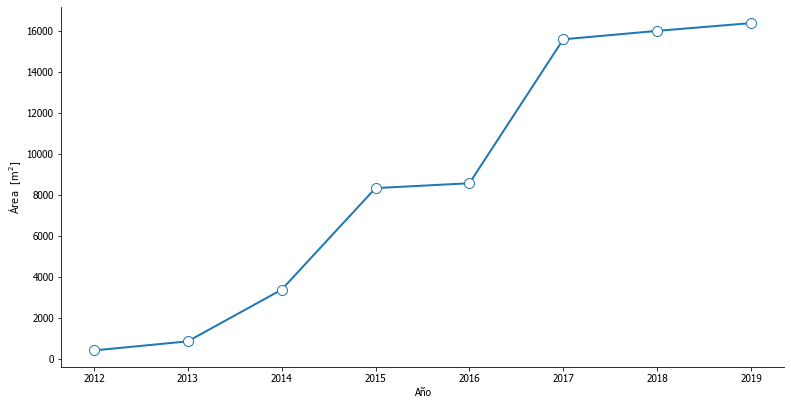

In [9]:
fig, ax = plt.subplots(constrained_layout=True,figsize=tamanio)


ax.plot(ps['Area instalada (gross), m2'].groupby(by=[ps.index]).sum().cumsum(), '-o',
        label="Area instalada")

ax.set_ylabel("Área  [$m^2$]")
ax.set_xlabel('Año')
ax.spines[['top','right']].set_visible(False)
plt.savefig('AreaInstalada.png')

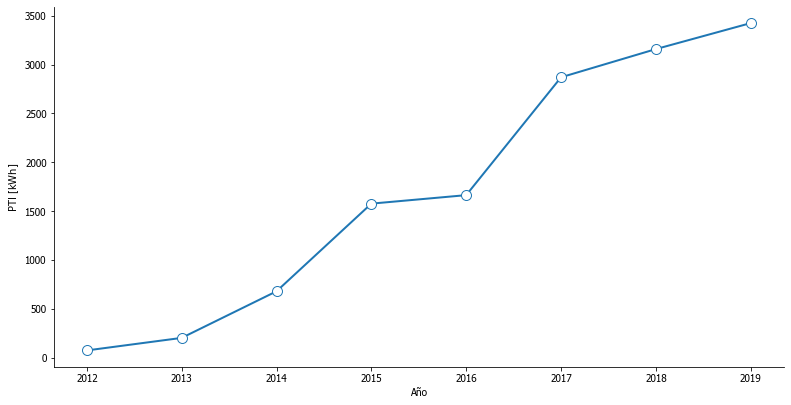

In [10]:
fig, ax = plt.subplots(constrained_layout=True,figsize=tamanio)


ax.plot(ps['Installed thermal power , kWth'].groupby(by=[ps.index]).sum().cumsum(), '-o',
        label="Area instalada")


ax.set_ylabel("PTI [$kWh$]")
ax.set_xlabel('Año')
ax.spines[['top','right']].set_visible(False)
plt.savefig('PotenciaTermicaInstalada.png')

C:\Users\gbv\AppData\Local\Temp\ipykernel_10748\1113556156.py:53: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  trans.loc[net_label]= total


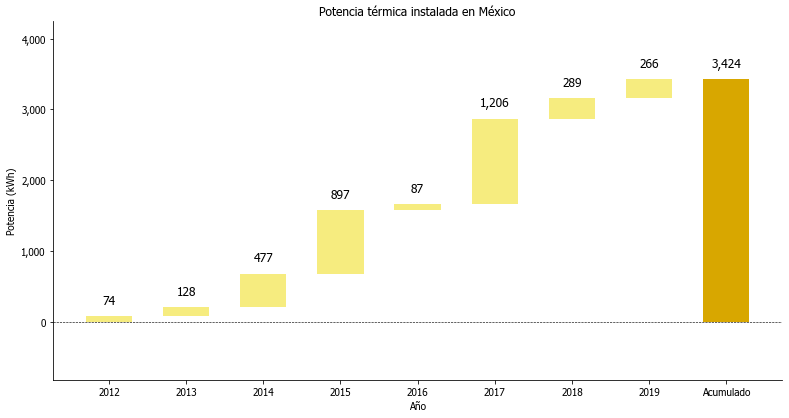

In [11]:
a = ps['Installed thermal power , kWth'].groupby(by=[ps.index]).sum().index.to_list()
a  = [str(A) for A in a]
b = ps['Installed thermal power , kWth'].groupby(by=[ps.index]).sum().to_list()

water(a, b, 
     rotation_value=0, 
     sorted_value=False,
     formatting="{:,.0f}",
     net_label='Acumulado',
     other_label='Peor año',
     blue_color=naranja, 
     green_color=amarilloclaro, 
     red_color='blue')
plt.title('Potencia térmica instalada en México')
plt.ylabel('Potencia (kWh)')
plt.xlabel('Año')
sns.despine()


In [ ]:
# worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# mex =worldmap.loc[worldmap.iso_a3=='MEX']

# fig, ax = plt.subplots(figsize=tamanio)
# mex =worldmap.loc[worldmap.iso_a3=='MEX']
# mex.plot(color="grey", ax=ax)

# # Plotting our Impact Energy data with a color map
# x = ps.Lon
# y = ps.Lat
# z = ps['Installed thermal power , kWth']
# mapa = ax.scatter(x, y, s=0.5*z, c=z, alpha=0.6, vmin=0,
#             cmap='jet')
# fig.colorbar(mapa,label='Potencia instalada [kWh]')

 
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")

In [12]:
mx   = gpd.read_file('mapa_mexico/').set_index('NOMEDO').to_crs(epsg=4485)
base = gpd.read_file('mapa_mexico/').set_index('NOMEDO').to_crs(epsg=4485)


f = 'https://docs.google.com/spreadsheets/d/' + '1000UCid4YLrPbrn5WmXpo08Eoi3D3ipLP_rThk-1Jko' + '/export?gid=0&format=csv'
plantas = pd.read_csv(f,index_col='NOMEDO')
plantas = plantas[['Installed thermal power , kWth']].groupby(by='NOMEDO').sum()
mx = mx.join(plantas,how='left')
# mx

In [17]:
mx['Installed thermal power , kWth'].min()

27.11

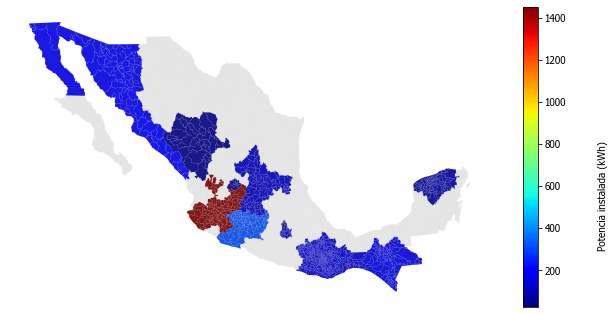

In [18]:
fig, ax = plt.subplots(figsize=tamanio)

mx.plot(column='Installed thermal power , kWth', ax=ax,
                legend=True,cmap='jet',vmin=27.11)
base.plot(ax=ax,alpha=0.2,color='grey')


# fig.subplots_adjust(right=1)
ax.text(4e6,2.0e6, "Potencia instalada (kWh)",rotation="vertical")
ax.set_axis_off()


In [ ]:
# fig, ax = plt.subplots()

# barra = mx.plot(column='Installed thermal power , kWth', ax=ax,
#                 legend=True,cmap='jet',scheme='quantiles', k=10,
#                 legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
#                          'fmt': "{:.0f}"})
# base.plot(ax=ax,alpha=0.2,color='grey')
# fig.set_size_inches(tamanio)
